In [1]:
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing,metrics 
from IPython.core.display import HTML
pd.set_option("display.max_columns",75)
import warnings
import math
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import linear_model,svm
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
import scipy.io
from sklearn.utils import resample


## Create the LOSS dataframe

In [97]:
mat_file= scipy.io.loadmat('LOSS.mat')
mat_file_pay = scipy.io.loadmat('PAY.mat')

np_array = np.array(mat_file['LOSS'])
df6 = pd.DataFrame(np_array)
df6.columns = ['NOI','DSCR','LTV','Balance','Rate','Fee','Net Mortgage Rate','Year Built','Renovation','Occupancy','ZipPop','CR','CS','CS Ratio','NOI Ratio','PV Ratio','IR']
df6.insert(len(df6.columns),'Loss', 1)
df6.head()

,NOI,DSCR,LTV,Balance,Rate,Fee,Net Mortgage Rate,Year Built,Renovation,Occupancy,ZipPop,CR,CS,CS Ratio,NOI Ratio,PV Ratio,IR,Loss
0,697399.0,1.35,69.4,7250000.0,5.25,0.0312,5.2188,1998.0,100.0,22919.0,7.663725,351.880464,1.136903,4.144921,0.143158,0.127688,5.0,1
1,1088638.0,1.36,61.3,9100000.0,5.52,0.0312,5.4888,1984.0,95.4,23129.0,8.779339,463.441807,1.502204,4.144921,0.310453,0.242793,21.0,1
2,618081.0,1.31,66.0,6650000.0,5.45,0.0312,5.4188,2001.0,87.2,32504.0,7.358107,293.888839,1.076208,4.419219,0.110992,0.101224,2.0,1
3,260695.0,1.55,64.2,2600000.0,5.21,0.1112,5.0988,1965.0,100.0,32376.0,7.781940,353.971808,3.315033,4.242222,0.117658,0.080235,40.0,1
4,607133.0,1.26,65.8,6500000.0,5.29,0.0312,5.2588,1970.0,100.0,12942.0,7.404061,316.183875,2.961139,4.242222,0.274014,0.196397,4.0,1


## Create the PAY dataframe

In [98]:
df7 = pd.DataFrame(np.array(mat_file_pay['PAY']))
df7.columns = ['NOI','DSCR','LTV','Balance','Rate','Fee','Net Mortgage Rate','Year Built','Renovation','Occupancy','ZipPop','CR','CS','CS Ratio','NOI Ratio','PV Ratio','IR']
df7.insert(len(df7.columns),'Loss', 0)
df7.head()


#Create a balanced dataframe (not working)
df7_downsampled = resample(df7, replace=False, n_samples=df6.shape[0], random_state=123)

## Merge the dataframes

In [101]:
Final_data = pd.concat([df6,df7], ignore_index = True)
print(data_clean)

           NOI      DSCR       LTV   Balance      Rate       Fee  \
0    -0.211250 -0.182981  0.400131 -0.213695 -0.804593 -0.524847   
1    -0.022793 -0.160105 -0.314070 -0.113434 -0.467438 -0.524847   
2    -0.249456 -0.274487  0.100343 -0.246212 -0.554848 -0.524847   
3    -0.421606  0.274547 -0.058368 -0.465701 -0.854542  2.080462   
4    -0.254730 -0.388869  0.082708 -0.254341 -0.754644 -0.524847   
...        ...       ...       ...       ...       ...       ...   
4788 -0.471895  0.032514 -0.941729 -0.550817  1.880163  0.491223   
4789 -0.463927 -0.237885 -0.282407 -0.538439  1.880163  0.491223   
4790 -0.496817 -0.309030  0.210868 -0.561960  2.005035  0.491223   
4791 -0.191746 -0.236054  0.746809 -0.298805  2.979040  0.491223   
4792 -0.314651 -0.347920  0.681914 -0.409892  3.066450  0.491223   

      Net Mortgage Rate  Year Built  Renovation  Occupancy    ZipPop  \
0             -0.786668    0.745813    0.741287  -0.606572  0.134334   
1             -0.448155    0.072515    

## Normalize function

Standardized vs Normalize -> what to use? 

In [100]:
#def normalize(df):
#    result = df.copy()
#    for feature_name in df.columns:
#        max_value = df[feature_name].max()
#        min_value = df[feature_name].min()
#        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
#    return result
#data_clean = pd.DataFrame(normalize(data_clean))
#data_clean.head()

scl = preprocessing.StandardScaler() #instance of preprocessing
fields = Final_data.columns.values[:-1]
data_clean = pd.DataFrame(scl.fit_transform(Final_data[fields]), columns = fields)
data_clean['Loss'] = Final_data['Loss']
data_clean['Loss'].value_counts()

0    3824
1     969
Name: Loss, dtype: int64

In [90]:
from sklearn.model_selection import GridSearchCV
def cross_validation_best_parameters(model, param_grid):
    grid = GridSearchCV(model, param_grid,cv=10, scoring='accuracy')
    X=data_clean.iloc[:,:-1].values
    y=data_clean.iloc[:,-1].values
    grid.fit(X,y)
    mean_scores = [result for result in grid.cv_results_['mean_test_score']]
    return mean_scores,grid.best_score_,grid.best_estimator_
logreg = linear_model.LogisticRegression(random_state=0)
c=[0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(C=c)
mean_scores,Best_Accuracy, Best_classifier = cross_validation_best_parameters(logreg,param_grid)
print("Best accuracy is "+ str(Best_Accuracy))
print(Best_classifier)

Best accuracy is 0.7982467814892137
LogisticRegression(C=0.01, random_state=0)


Logistic regression accuracy is  0.8240611961057024


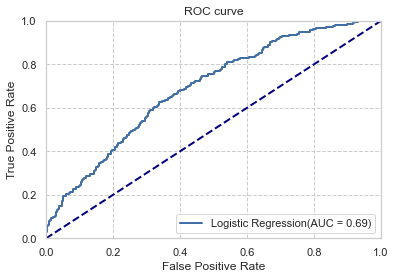

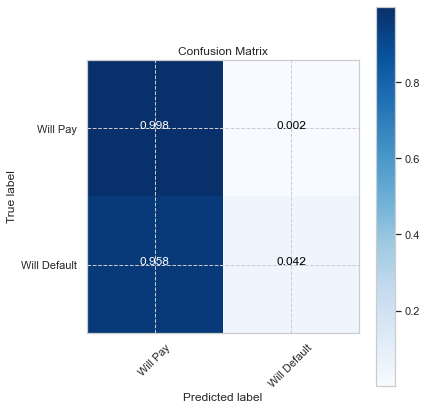

In [104]:
X_train, X_test, y_train, y_test = train_test_split(data_clean.iloc[:,:-1], data_clean.iloc[:,-1], test_size=0.3, random_state=31)

clf_LR = linear_model.LogisticRegression(C=0.01)
clf_LR.fit(X_train,y_train)
LR_Predict = clf_LR.predict_proba(X_test)[:,1]
LR_Predict_bin = clf_LR.predict(X_test)
LR_Accuracy = accuracy_score(y_test,LR_Predict.round())
print("Logistic regression accuracy is ",LR_Accuracy)


plotAUC(y_test,LR_Predict,'Logistic Regression')
plt.show()
plt.figure(figsize=(6,6))
plot_confusion_matrix(LR_Predict_bin, normalize=True)
plt.show()

## Correlation Matrix & Heatmap

In [13]:
data_clean.corr()


,NOI,DSCR,LTV,Balance,Rate,Fee,Net Mortgage Rate,Year Built,Renovation,Occupancy,ZipPop,CR,CS,CS Ratio,NOI Ratio,PV Ratio,IR,Loss
NOI,1.000000,0.122950,-0.015557,0.904979,-0.092564,-0.099187,-0.088382,-0.004661,-0.097906,-0.099355,-0.039261,-0.031610,-0.013732,-0.028327,0.941002,0.938568,-0.025669,-0.033794
DSCR,0.122950,1.000000,-0.400696,0.038571,-0.158859,-0.006513,-0.158908,-0.057814,-0.055856,-0.027073,0.062389,0.099111,0.028159,-0.132254,0.142474,0.162486,0.022581,-0.094803
LTV,-0.015557,-0.400696,1.000000,0.088660,0.072736,0.007184,0.074860,0.106693,0.035194,-0.018046,-0.037836,-0.072655,0.022562,0.125718,-0.018622,-0.033788,-0.051427,0.185997
Balance,0.904979,0.038571,0.088660,1.000000,-0.134484,-0.141188,-0.128766,-0.004555,-0.082617,-0.078491,-0.181428,-0.172316,-0.058362,-0.035737,0.842617,0.872621,-0.037524,-0.016545
Rate,-0.092564,-0.158859,0.072736,-0.134484,1.000000,0.265024,0.993967,-0.052757,0.016078,-0.027228,0.356323,0.143955,0.030534,0.775484,-0.087840,-0.111365,-0.041804,0.045590
Fee,-0.099187,-0.006513,0.007184,-0.141188,0.265024,1.000000,0.230023,0.022689,0.063613,-0.007794,0.264194,0.228534,-0.025352,0.133246,-0.085985,-0.085975,-0.002223,-0.020853
Net Mortgage Rate,-0.088382,-0.158908,0.074860,-0.128766,0.993967,0.230023,1.000000,-0.050146,0.014589,-0.025839,0.347239,0.135462,0.030513,0.773203,-0.084010,-0.107677,-0.040708,0.047168
Year Built,-0.004661,-0.057814,0.106693,-0.004555,-0.052757,0.022689,-0.050146,1.000000,-0.033207,0.086123,-0.028604,-0.018969,0.033025,-0.035368,-0.000924,-0.009677,-0.287432,0.010995
Renovation,-0.097906,-0.055856,0.035194,-0.082617,0.016078,0.063613,0.014589,-0.033207,1.000000,0.071285,-0.074684,-0.095288,-0.083508,0.073618,-0.163542,-0.102381,0.072179,-0.045576
Occupancy,-0.099355,-0.027073,-0.018046,-0.078491,-0.027228,-0.007794,-0.025839,0.086123,0.071285,1.000000,-0.088917,-0.087453,0.005195,-0.006626,-0.097969,-0.088293,0.047940,-0.020596


<AxesSubplot:>

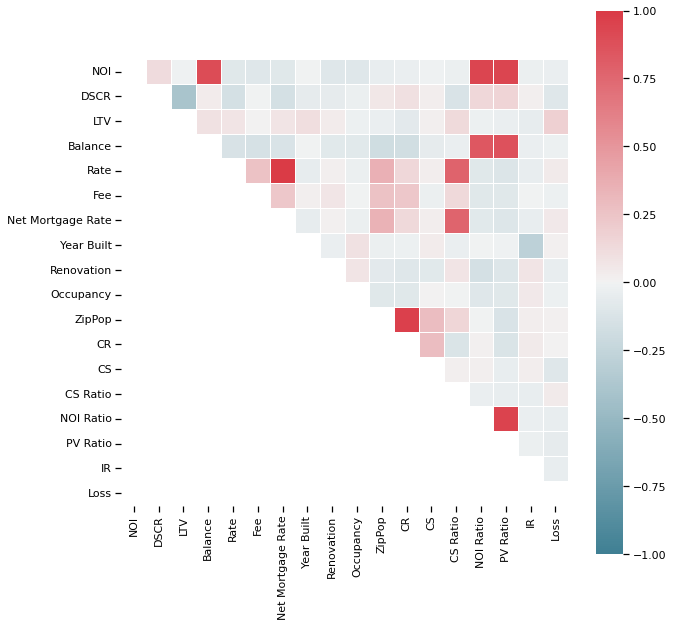

In [14]:
dataViz = data_clean
sns.set_context(context='notebook')
fig, ax = plt.subplots(figsize=(10,10)) 
corr = dataViz.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.tril_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, cmap=cmap,linewidths=1, vmin=-1, vmax=1, square=True, cbar=True, center=0, ax=ax, mask=mask)



#WE SHOULD DROP VARIABLES WITH HIGH CORRELATION
#df = df.drop(columns = ['',...])

## Plots of important correlations

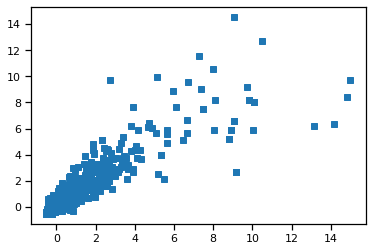

In [15]:
plt.plot(data_clean['NOI'],data_clean['Balance'],'s')

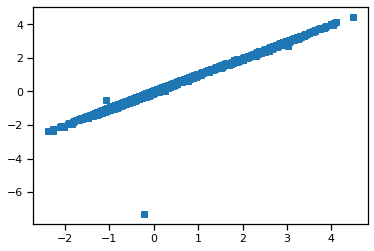

In [16]:
plt.plot(data_clean['Rate'],data_clean['Net Mortgage Rate'],'s')

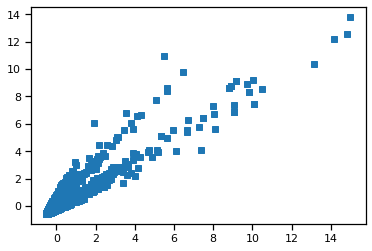

In [17]:
plt.plot(data_clean['NOI'],data_clean['NOI Ratio'],'s')

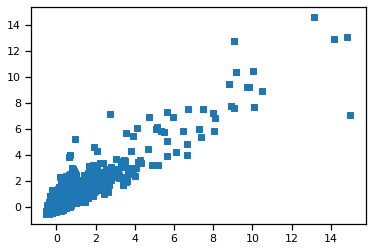

In [18]:
plt.plot(data_clean['NOI'],data_clean['PV Ratio'],'s')

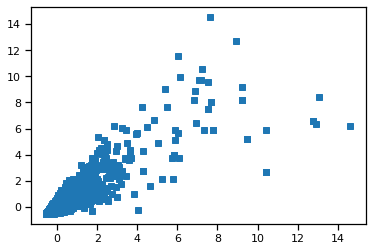

In [19]:
plt.plot(data_clean['PV Ratio'],data_clean['Balance'],'s')

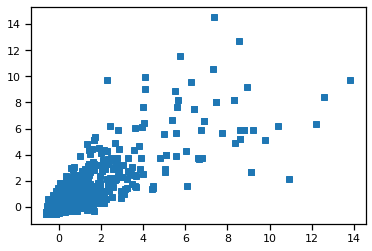

In [20]:
plt.plot(data_clean['NOI Ratio'],data_clean['Balance'],'s')

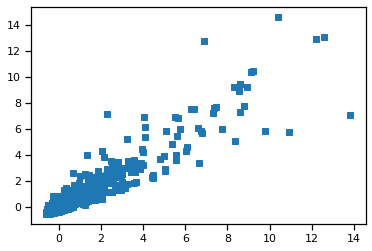

In [21]:
plt.plot(data_clean['NOI Ratio'],data_clean['PV Ratio'],'s')

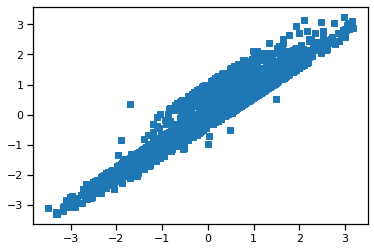

In [22]:
plt.plot(data_clean['CR'],data_clean['ZipPop'],'s')

## Distribution of the variables

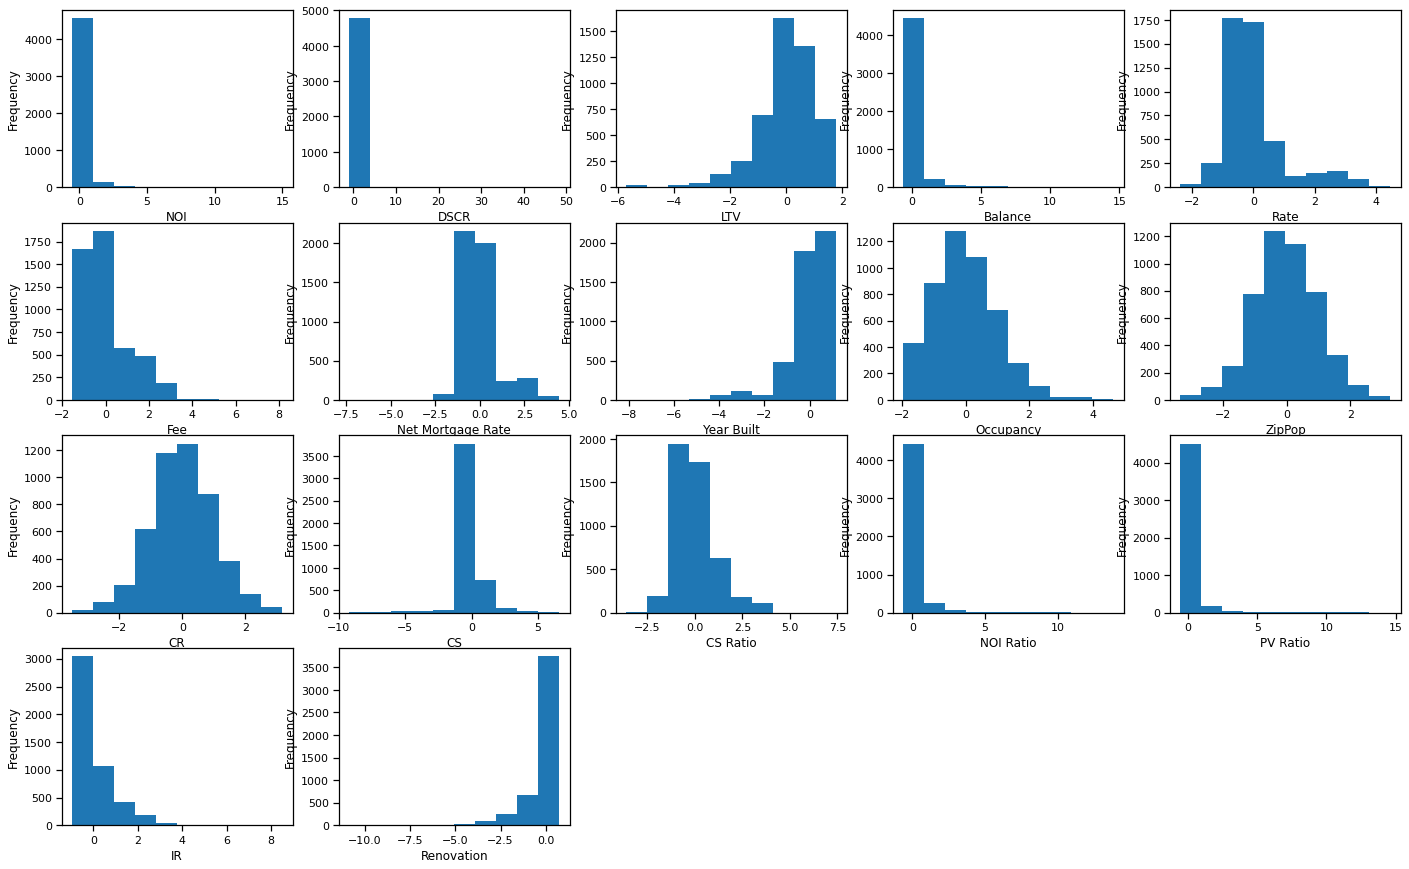

In [23]:
numeric_vars = ['NOI','DSCR','LTV','Balance','Rate','Fee','Net Mortgage Rate','Year Built','Occupancy','ZipPop','CR','CS','CS Ratio','NOI Ratio','PV Ratio','IR','Renovation']

# create histograms for each numeric variable
fig = plt.figure(figsize=(24, 15))
for i in range(len(numeric_vars)):
    var = numeric_vars[i]
    sub = fig.add_subplot(4, 5, i+1)
    sub.set_xlabel(var)
    data_clean[var].plot(kind = 'hist')

## Function for learning curve (?)

In [24]:

import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt

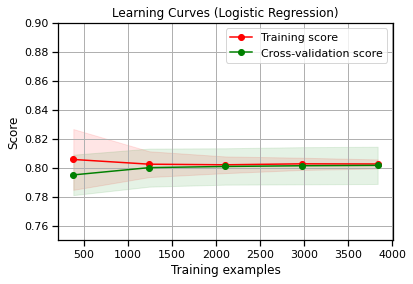

In [25]:
X, y = data_clean.iloc[:,:-1].values, data_clean.iloc[:,-1].values
title = "Learning Curves (Logistic Regression)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = linear_model.LogisticRegression()
plot_learning_curve(estimator, title, X, y, ylim=(0.75, 0.90), cv=cv, n_jobs=4)
plt.show()


## AUC plot function

In [26]:
import seaborn as sns
sns.set('talk', 'whitegrid', 'dark', font_scale=1,rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
def plotAUC(truth, pred, lab):
    fpr, tpr, _ = metrics.roc_curve(truth,pred)
    roc_auc = metrics.auc(fpr, tpr)
    lw = 2
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color= c,lw=lw, label= lab +'(AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve') #Receiver Operating Characteristic 
    plt.legend(loc="lower right")

## Confusion Matrix Plot Function

In [27]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
    cm = confusion_matrix(y_test, model, labels=[0, 1])
    classes=["Will Pay", "Will Default"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Data split into training and testing

In [28]:
X_train, X_test, y_train, y_test = train_test_split(data_clean.iloc[:,:-1], data_clean.iloc[:,-1], test_size=0.2, random_state=42)
bs_train, bs_test = train_test_split(data_clean, test_size = 0.2, random_state=42) #just for bootstrapping

## Recursive Feature Elimination

In [46]:
from sklearn.feature_selection import RFE
# create the RFE model and select 3 attributes
clf_LR = linear_model.LogisticRegression(C=1e30)
clf_LR.fit(X_train,y_train)
rfe = RFE(clf_LR, n_features_to_select=10)
rfe = rfe.fit(data_clean.iloc[:,:-1].values, data_clean.iloc[:,-1].values)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

labels = ['NOI','DSCR','LTV','Balance','Rate','Fee','Net Mortgage Rate','Year Built','Renovation','Occupancy','ZipPop','CR','CS','CS Ratio','NOI Ratio','PV Ratio','IR']
res = [i for i, val in enumerate(rfe.support_) if val]

for i in res:
    print(labels[i])

[False  True  True  True  True False  True False  True False False  True
  True False  True  True False]
[5 1 1 1 1 3 1 6 1 8 4 1 1 7 1 1 2]
DSCR
LTV
Balance
Rate
Net Mortgage Rate
Renovation
CR
CS
NOI Ratio
PV Ratio


In [59]:
from sklearn.feature_selection import RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

# create the RFE model and select 3 attributes

rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=10)
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])

# summarize the selection of the attributes
pipeline.fit(X_train, y_train)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

labels = ['NOI','DSCR','LTV','Balance','Rate','Fee','Net Mortgage Rate','Year Built','Renovation','Occupancy','ZipPop','CR','CS','CS Ratio','NOI Ratio','PV Ratio','IR']
res = [i for i, val in enumerate(rfe.support_) if val]

for i in res:
    print(labels[i])

Accuracy: 0.702 (0.019)
NOI
DSCR
LTV
Net Mortgage Rate
Occupancy
CR
CS
CS Ratio
PV Ratio
IR


## Principal Component Analysis

In [42]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=4, whiten=True)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print('Expected Variance is '+ str(explained_variance))

Expected Variance is [0.23737401 0.1724296  0.12301408 0.08352137]


In [60]:
X_train_features = X_train.loc[:,rfe.support_]
X_test_features = X_test.loc[:,rfe.support_]
data_clean_features = data_clean.loc[:,np.append(rfe.support_,True)]
print(X_train_features.shape)
print(X_test_features.shape)
print(data_clean_features)

(3834, 10)
(959, 10)
           NOI      DSCR       LTV  Net Mortgage Rate  Occupancy        CR  \
0    -0.211250 -0.182981  0.400131          -0.786668  -0.606572  0.328978   
1    -0.022793 -0.160105 -0.314070          -0.448155  -0.594049  0.913352   
2    -0.249456 -0.274487  0.100343          -0.535917  -0.035018  0.025210   
3    -0.421606  0.274547 -0.058368          -0.937119  -0.042650  0.339933   
4    -0.254730 -0.388869  0.082708          -0.736518  -1.201500  0.141994   
...        ...       ...       ...                ...        ...       ...   
4788 -0.471895  0.032514 -0.941729           1.869786  -0.122674 -0.611781   
4789 -0.463927 -0.237885 -0.282407           1.869786  -1.569835 -0.317603   
4790 -0.496817 -0.309030  0.210868           1.995161   0.012269 -0.146600   
4791 -0.191746 -0.236054  0.746809           2.973090   1.456746  0.069849   
4792 -0.314651 -0.347920  0.681914           3.060853  -1.116587  0.357093   

            CS  CS Ratio  PV Ratio        

<AxesSubplot:>

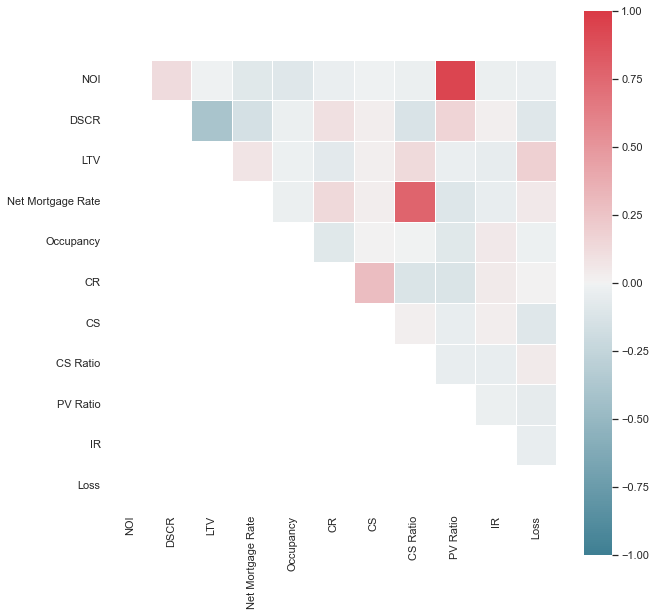

In [61]:
dataViz = data_clean_features
sns.set_context(context='notebook')
fig, ax = plt.subplots(figsize=(10,10)) 
corr = dataViz.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.tril_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, cmap=cmap,linewidths=1, vmin=-1, vmax=1, square=True, cbar=True, center=0, ax=ax, mask=mask)

## RANDOM FOREST WITH RANDOMIZED SEARCH

In [93]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier(criterion='gini', random_state=0)
maxFeatures = range(1,data_clean.shape[1])
param_dist = dict(max_features=maxFeatures)
rand = RandomizedSearchCV(rf, param_dist, cv=10, scoring='accuracy', n_iter=len(maxFeatures), random_state=10)
X=data_clean.iloc[:,:-1].values
y=data_clean.iloc[:,-1].values
rand.fit(X,y)
results = rand.cv_results_
#print('Best Accuracy = '+str(rand.best_score_))
print(rand.best_estimator_)

RandomForestClassifier(max_features=1, random_state=0)


In [63]:
randomForest = RandomForestClassifier(bootstrap=True,criterion = "gini",max_features=1,random_state=0 )
randomForest.fit(X_train,y_train)
rfPredict = randomForest.predict(X_test)
rfPredictproba = randomForest.predict_proba(X_test)[:,1] #for ROC curve
rfAccuracy = accuracy_score(y_test,rfPredict)
roc_score = metrics.roc_auc_score(y_test,rfPredict)
print(rfAccuracy)

0.7778936392075079


In [64]:
print(randomForest.feature_importances_)
print(len(maxFeatures))


[0.0590629  0.06333392 0.07068809 0.05940533 0.06060919 0.0595935
 0.06189051 0.05334425 0.04905925 0.05841595 0.0591782  0.05655448
 0.06804139 0.05198082 0.06004289 0.06028203 0.04851729]
10


ValueError: shape mismatch: objects cannot be broadcast to a single shape

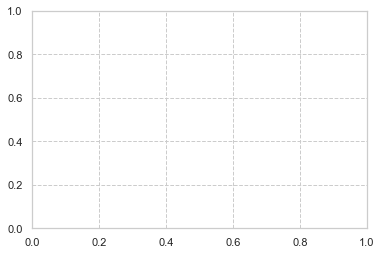

In [66]:
fig, ax = plt.subplots()
width=0.35
ax.bar(np.arange(len(maxFeatures)), randomForest.feature_importances_, width, color='r')
ax.set_xticks(np.arange(len(randomForest.feature_importances_)))
ax.set_xticklabels(X_train.columns.values,rotation=90)
plt.title('Feature Importance from DT')
ax.set_ylabel('Normalized Gini Importance')

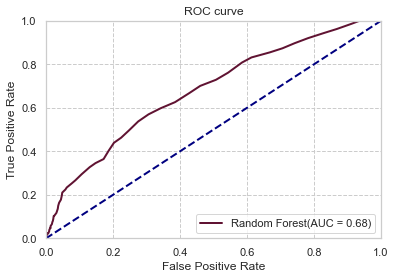

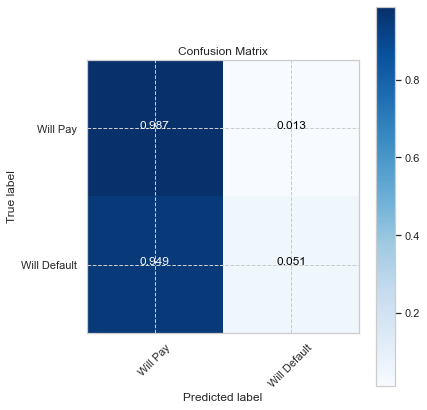

In [65]:
plotAUC(y_test,rfPredictproba, 'Random Forest')
plt.show()
plt.figure(figsize=(6,6))
plot_confusion_matrix(rfPredict, normalize=True)
plt.show()

## Logistic Regression

In [67]:
from sklearn.model_selection import GridSearchCV
def cross_validation_best_parameters(model, param_grid):
    grid = GridSearchCV(model, param_grid,cv=10, scoring='accuracy')
    X=data_clean.iloc[:,:-1].values
    y=data_clean.iloc[:,-1].values
    grid.fit(X,y)
    mean_scores = [result for result in grid.cv_results_['mean_test_score']]
    return mean_scores,grid.best_score_,grid.best_estimator_
logreg = linear_model.LogisticRegression(random_state=0)
c=[0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(C=c)
mean_scores,Best_Accuracy, Best_classifier = cross_validation_best_parameters(logreg,param_grid)
print("Best accuracy is "+ str(Best_Accuracy))
print(Best_classifier)

Best accuracy is 0.7982467814892137
LogisticRegression(C=0.01, random_state=0)


Logistic regression accuracy is  0.7789363920750783


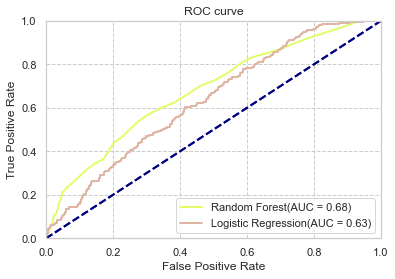

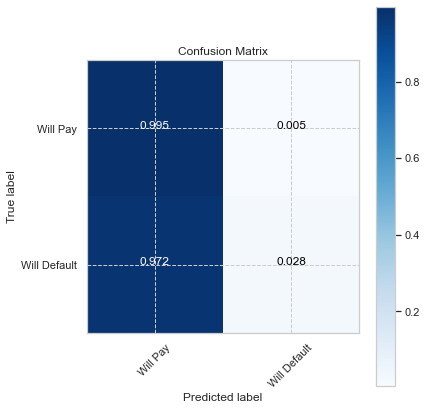

In [68]:
clf_LR = linear_model.LogisticRegression(C=Best_classifier.C)
clf_LR.fit(X_train,y_train)
LR_Predict = clf_LR.predict_proba(X_test)[:,1]
LR_Predict_bin = clf_LR.predict(X_test)
LR_Accuracy = accuracy_score(y_test,LR_Predict.round())
print("Logistic regression accuracy is ",LR_Accuracy)
plotAUC(y_test,rfPredictproba, 'Random Forest')
plotAUC(y_test,LR_Predict,'Logistic Regression')
plt.show()
plt.figure(figsize=(6,6))
plot_confusion_matrix(LR_Predict_bin, normalize=True)
plt.show()


In [89]:
from sklearn.metrics import classification_report

print("RF",classification_report(y_test, rfPredict, target_names=None))
print("LR",classification_report(y_test, LR_Predict_bin, target_names=None))


RF               precision    recall  f1-score   support

         0.0       0.80      0.98      0.88       745
         1.0       0.62      0.13      0.22       214

    accuracy                           0.79       959
   macro avg       0.71      0.55      0.55       959
weighted avg       0.76      0.79      0.73       959

LR               precision    recall  f1-score   support

         0.0       0.78      1.00      0.87       745
         1.0       0.00      0.00      0.00       214

    accuracy                           0.78       959
   macro avg       0.39      0.50      0.44       959
weighted avg       0.60      0.78      0.68       959



In [39]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
x_columns = ['NOI','DSCR','LTV','Balance','Rate','Fee','Net Mortgage Rate','Year Built','Renovation','Occupancy','ZipPop','CR','CS','CS Ratio','NOI Ratio','PV Ratio','IR']
y = data_clean["Loss"]
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(data_clean[x_columns], y)
selector.support_

array([ True, False, False,  True, False, False, False, False, False,
       False, False, False, False,  True, False,  True,  True])

Logistic regression accuracy is  0.8219749652294854


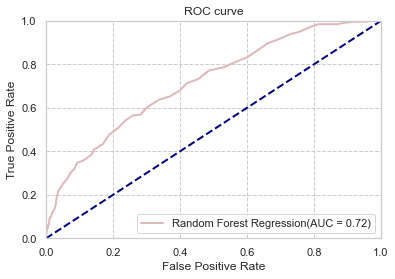

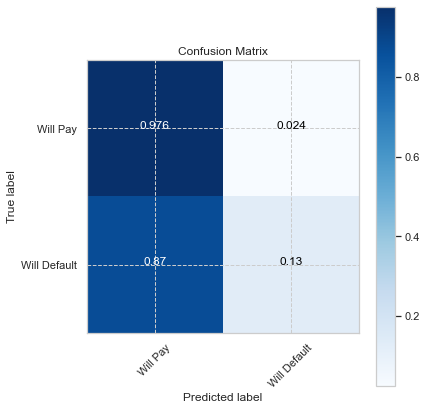

In [105]:
from sklearn import ensemble

clf_RF = ensemble.RandomForestClassifier()
clf_RF.fit(X_train, y_train)


RF_Predict = clf_RF.predict_proba(X_test)[:,1]
RF_Predict_bin = clf_RF.predict(X_test)
RF_Accuracy = accuracy_score(y_test,RF_Predict.round())
print("Logistic regression accuracy is ",RF_Accuracy)


plotAUC(y_test,RF_Predict,'Random Forest Regression')
plt.show()
plt.figure(figsize=(6,6))
plot_confusion_matrix(RF_Predict_bin, normalize=True)
plt.show()

Logistic regression accuracy is  0.8240611961057024


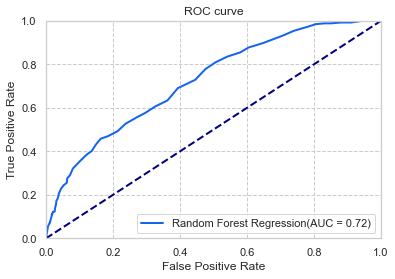

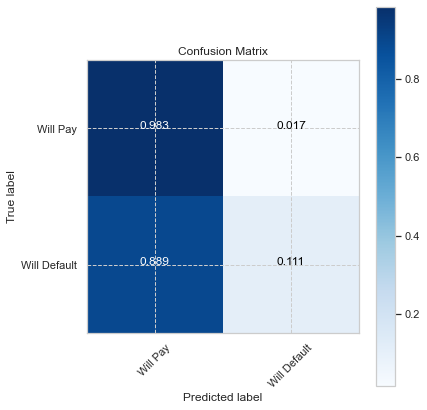

In [109]:
class_weight = {0: 1, 1:10}
clf_RF = ensemble.RandomForestClassifier(class_weight=class_weight)
clf_RF.fit(X_train, y_train)


RF_Predict = clf_RF.predict_proba(X_test)[:,1]
RF_Predict_bin = clf_RF.predict(X_test)
RF_Accuracy = accuracy_score(y_test,RF_Predict.round())
print("Logistic regression accuracy is ",RF_Accuracy)


plotAUC(y_test,RF_Predict,'Random Forest Regression')
plt.show()
plt.figure(figsize=(6,6))
plot_confusion_matrix(RF_Predict_bin, normalize=True)
plt.show()

----- k = 1 -----
Logistic regression accuracy is  0.19610570236439498


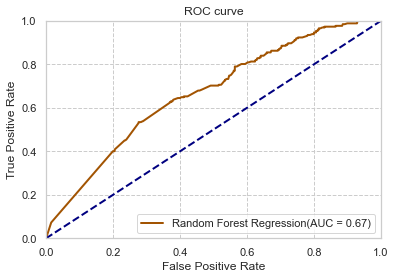

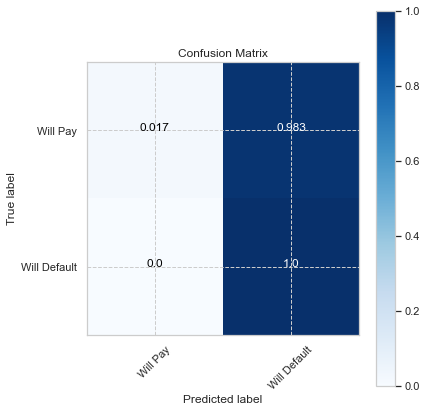

----- k = 2 -----
Logistic regression accuracy is  0.26286509040333794


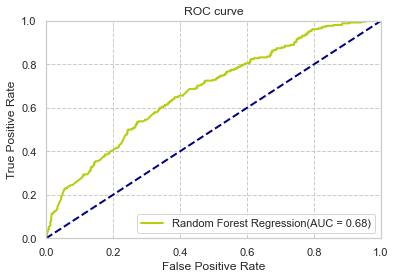

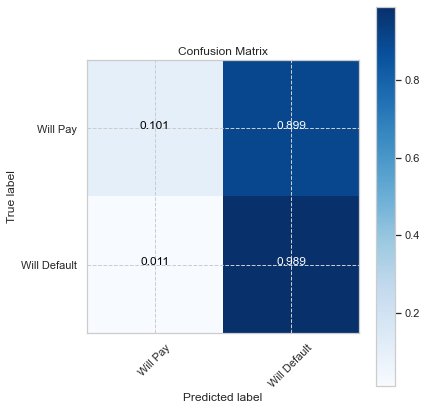

----- k = 3 -----
Logistic regression accuracy is  0.29833101529902645


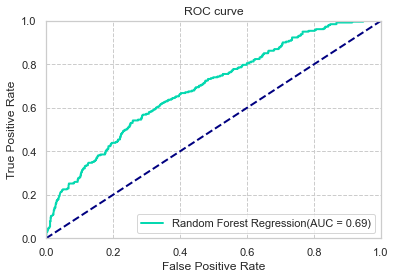

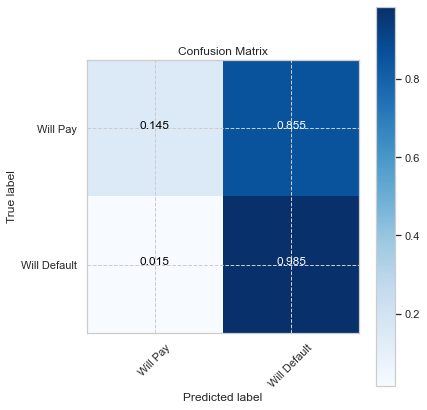

----- k = 4 -----
Logistic regression accuracy is  0.32336578581363007


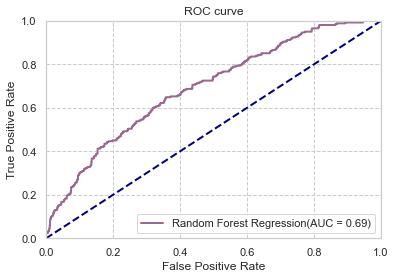

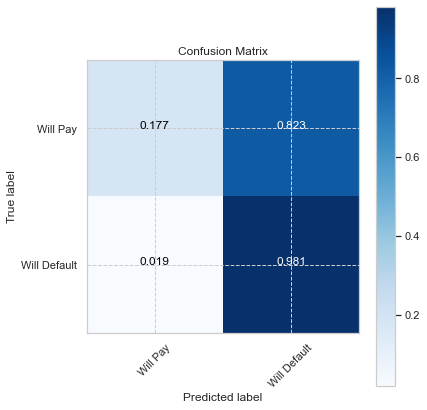

----- k = 5 -----
Logistic regression accuracy is  0.34075104311543813


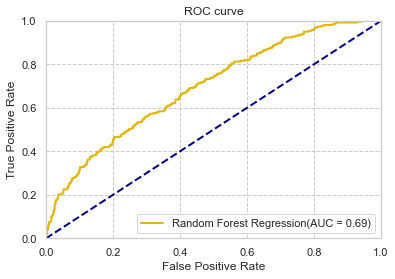

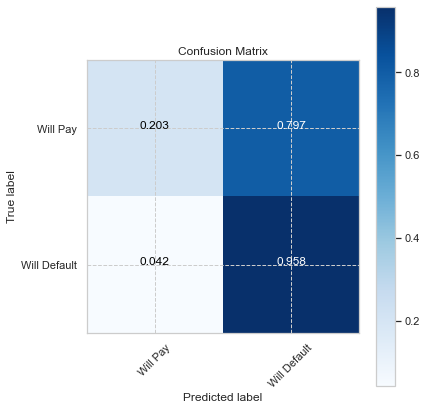

----- k = 6 -----
Logistic regression accuracy is  0.3553546592489569


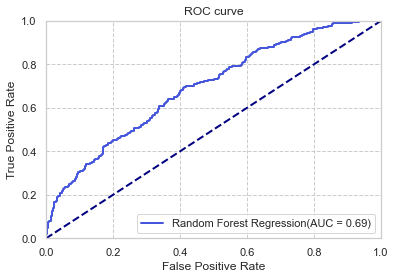

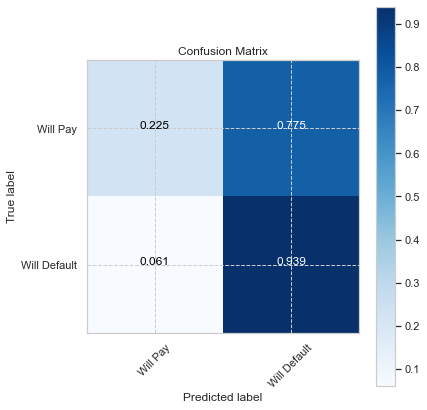

----- k = 7 -----
Logistic regression accuracy is  0.3963838664812239


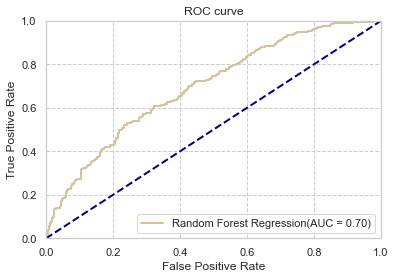

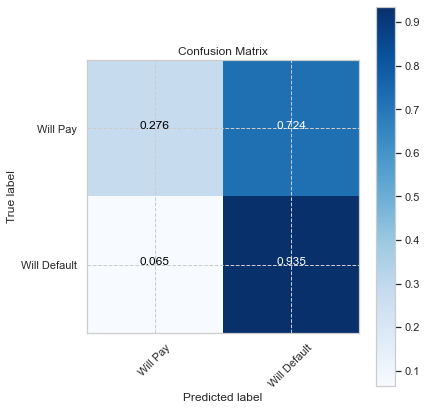

----- k = 8 -----
Logistic regression accuracy is  0.41168289290681503


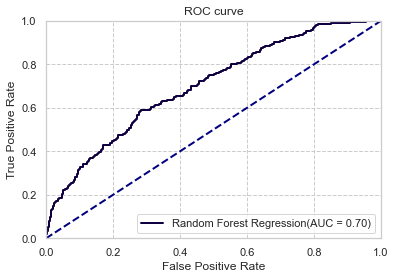

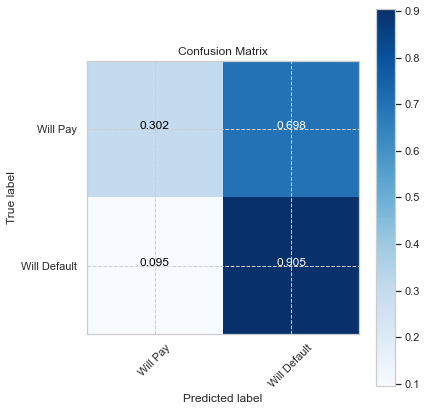

----- k = 9 -----
Logistic regression accuracy is  0.44019471488178025


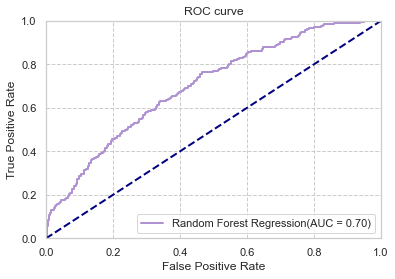

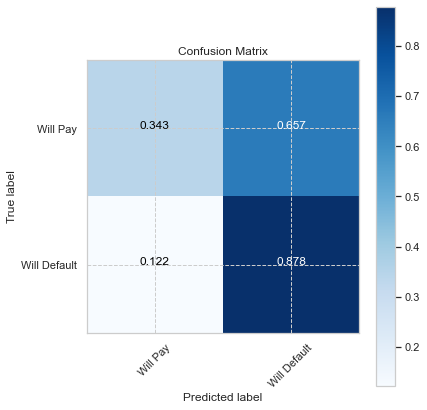

----- k = 10 -----
Logistic regression accuracy is  0.4721835883171071


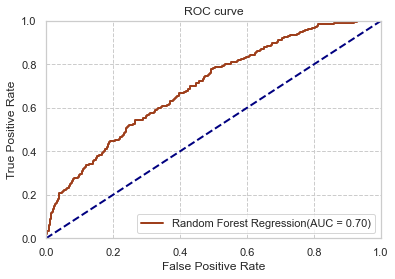

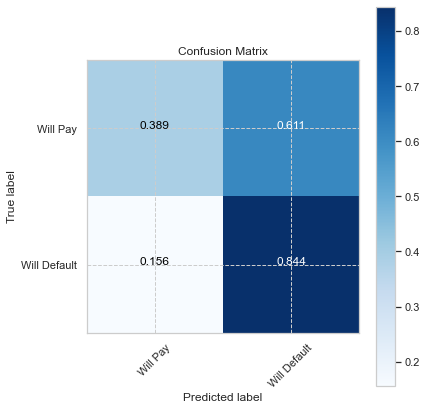

----- k = 11 -----
Logistic regression accuracy is  0.5083449235048678


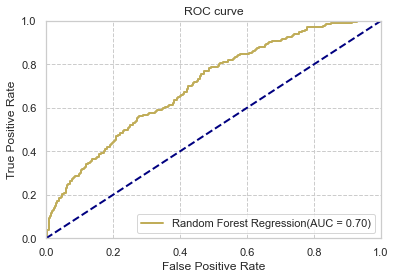

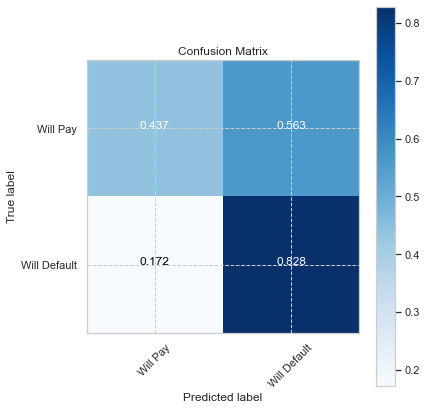

----- k = 12 -----
Logistic regression accuracy is  0.5305980528511822


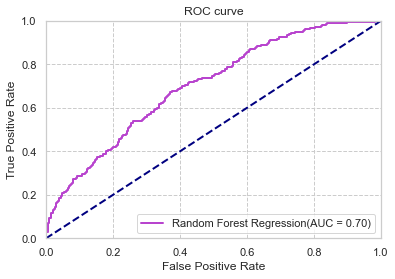

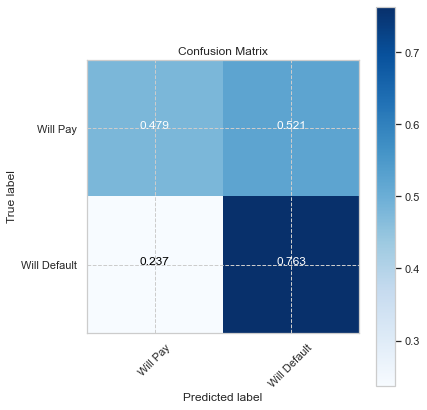

----- k = 13 -----
Logistic regression accuracy is  0.5806675938803895


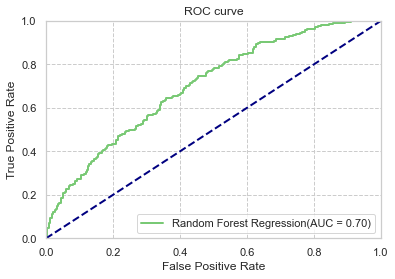

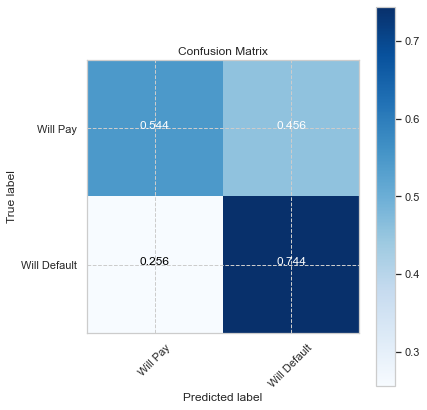

----- k = 14 -----
Logistic regression accuracy is  0.6223922114047288


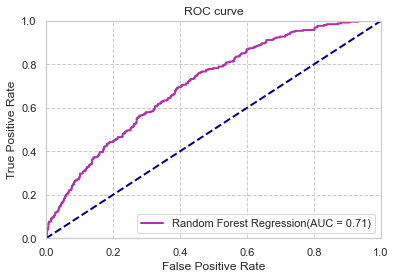

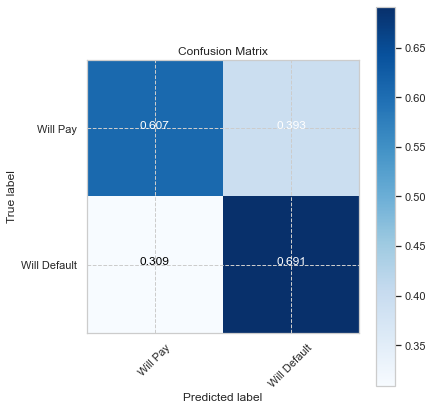

----- k = 15 -----
Logistic regression accuracy is  0.6689847009735744


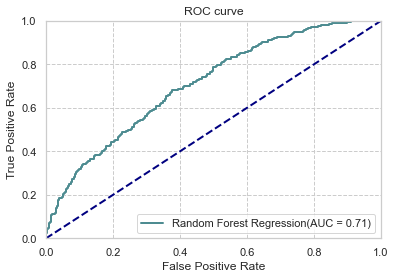

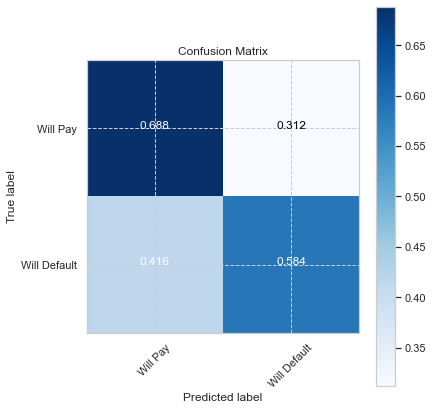

----- k = 16 -----
Logistic regression accuracy is  0.6877607788595271


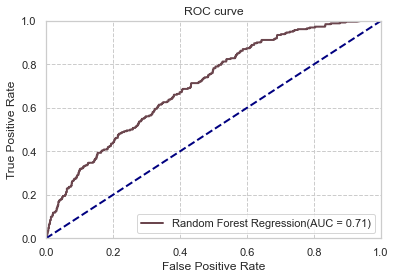

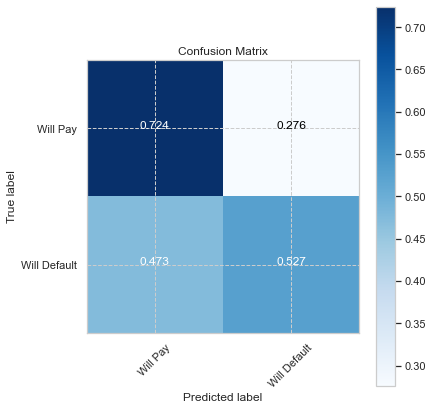

----- k = 17 -----
Logistic regression accuracy is  0.7308762169680111


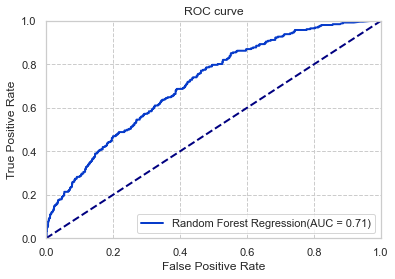

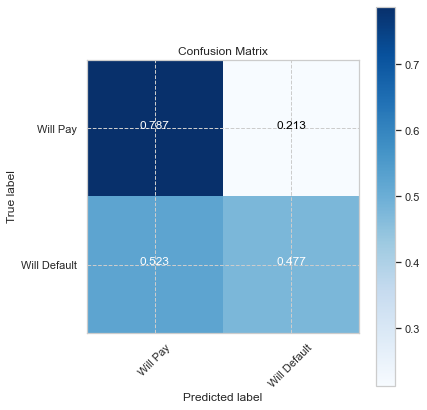

----- k = 18 -----
Logistic regression accuracy is  0.7406119610570236


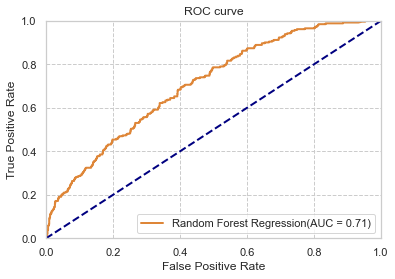

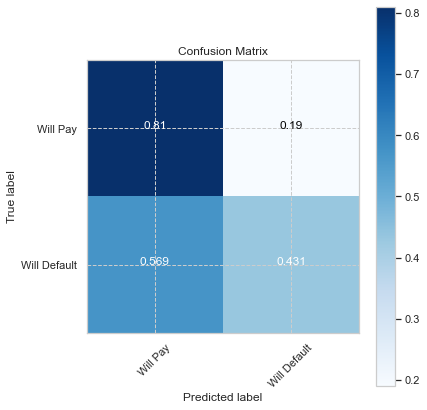

----- k = 19 -----
Logistic regression accuracy is  0.7593880389429764


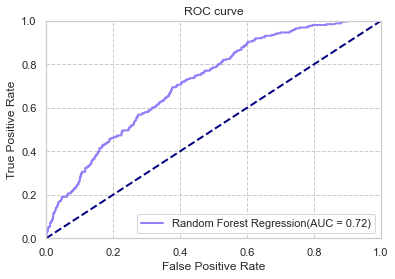

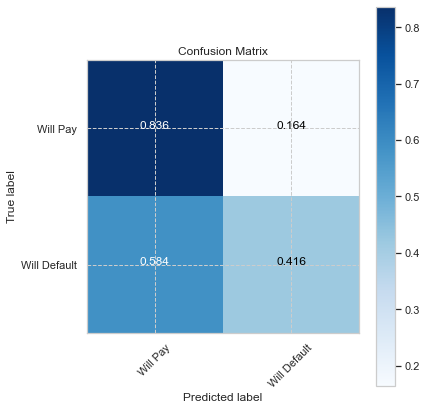

In [112]:
ks = list(range(1,20))

for k in ks:
    print('----- k = %d -----' % k)
    clf_RF = ensemble.RandomForestClassifier(class_weight=class_weight, max_depth=k)
    clf_RF.fit(X_train, y_train)
    
    RF_Predict = clf_RF.predict_proba(X_test)[:,1]
    RF_Predict_bin = clf_RF.predict(X_test)
    RF_Accuracy = accuracy_score(y_test,RF_Predict.round())
    print("Logistic regression accuracy is ",RF_Accuracy)


    plotAUC(y_test,RF_Predict,'Random Forest Regression')
    plt.show()
    plt.figure(figsize=(6,6))
    plot_confusion_matrix(RF_Predict_bin, normalize=True)
    plt.show()



